# GOLF timing

In [1]:
import numpy as np
import apollinaire as apn
import matplotlib
matplotlib.use ('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.markers as markers
from os import path

Defining parameters for the cross-correlation operation:

In [2]:
#Defining parameters for the cross-correlation operation
sampling = 60 #GOLF and VIRGO series are sampled at 60s

#subseries of 10 days with an overlap of one day will be considered
sample_size = 14400 
overlap = 1440

#Cross correlation will be computed with a maximum lag of 20 minute
maxlag=20

#The guess frequency that will be considered for the gaussian cosinus
#fit is 0.2 min^-1
freq_init = 0.2

shiftmax = 10

### First steps

Downloading (if necessary) timeseries and opening files.

GOLF series starts on 11/04/1996.
VIRGO series starts on 23/01/1996.

In [3]:
#write a function that will download VIRGO and GOLF series if the user do not have it

In [4]:
seriesDir = '../timeseries/'
file_golf = 'Res_bw_rw_3_960411_191202_F_dt60s.fits'
file_virgogreen = 'VIRGO-SPM-GREEN-L2-MISSIONLONG.fits'
file_virgored = 'VIRGO-SPM-RED-L2-MISSIONLONG.fits'
file_virgoblue = 'VIRGO-SPM-BLUE-L2-MISSIONLONG.fits'

Reading GOLF fits file

In [5]:
hdu_golf = fits.open (seriesDir + file_golf) [0]
data_1 = np.array (hdu_golf.data)

Reading VIRGO fits file and computing the mean of the three channels (blue, green and red).

In [6]:
hdu_green = fits.open (seriesDir + file_virgogreen) [0]
hdu_red = fits.open (seriesDir + file_virgored) [0]
hdu_blue = fits.open (seriesDir + file_virgoblue) [0]
data_red = np.array (hdu_red.data)
data_green = np.array (hdu_green.data)
data_blue = np.array (hdu_blue.data)


data_2 = (data_red + data_green + data_blue) / 3.

# Removing 79 first days of VIRGO series to make it start 
# on 11/04/1996 like GOLF. 
data_2 = data_2 [79*1440:]
data_2 = np.nan_to_num (data_2, copy=True)

Determining the number of subseries that will be considered in the analysis.

In [7]:
n_sample_1 = data_1.size // overlap - sample_size//overlap
n_sample_2 = data_2.size // overlap - sample_size//overlap
n_sample = min (n_sample_1, n_sample_2)

### Cross-correlation and gaussian cosinus fit

In [8]:
lags = np.array ([i for i in range (-maxlag+1, maxlag)])
shifts = []

In [9]:
for ii in range (n_sample) :
    sub1 = data_1 [ii*overlap :ii*(overlap)+sample_size]
    sub2 = data_2 [ii*overlap:ii*(overlap)+sample_size]
    # applying backward difference filter
    sub1 = apn.processing.bdf (sub1)
    sub2 = apn.processing.bdf (sub2)
    tshift = apn.timing.compute_shift (sub1, sub2, maxlag, freq_init, 
                                       shiftmax, lags, plot=False, subindex=ii)
    shifts.append (tshift)

stamps = np.linspace (0, n_sample-1, n_sample)
shifts = np.array (shifts)

/Users/students/Workspace_Sylvain/apollinaire/apollinaire/timing/compute_shift.py:149: RuntimeWarning: invalid value encountered in true_divide
  cc = cc / (sub2.std () * sub1.std () * sub2.size)
/Users/students/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Subseries 1812: envelope fitting failed


/Users/students/Workspace_Sylvain/apollinaire/apollinaire/timing/compute_shift.py:37: RuntimeWarning: divide by zero encountered in true_divide
  return A * np.exp ( - (x - alpha) * (x - alpha) / beta )
/Users/students/Workspace_Sylvain/apollinaire/apollinaire/timing/compute_shift.py:37: RuntimeWarning: invalid value encountered in true_divide
  return A * np.exp ( - (x - alpha) * (x - alpha) / beta )


Subseries 6824: cos fitting failed


### Plot shifts

<IPython.core.display.Javascript object>


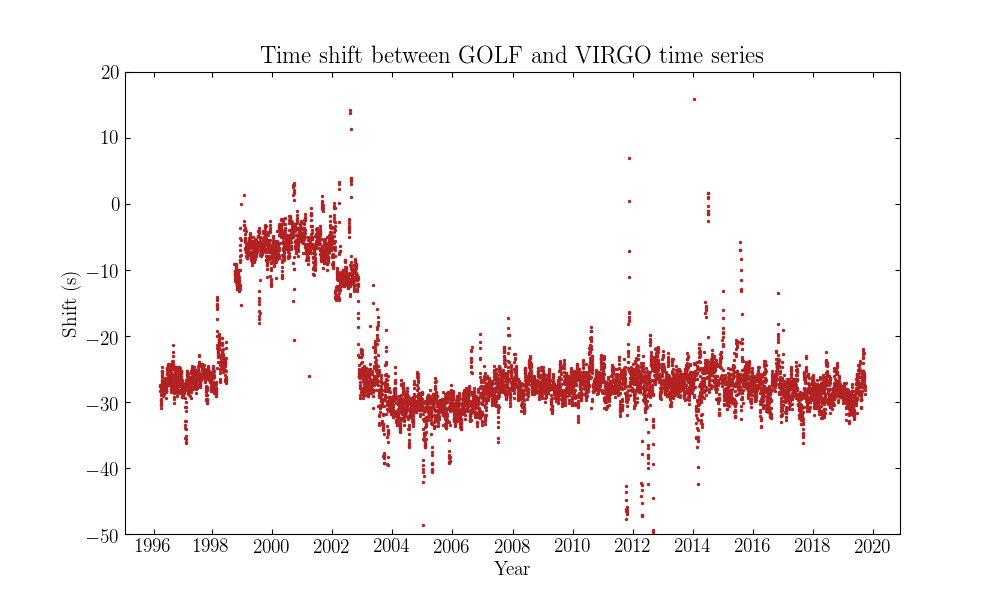

/Users/students/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


Text(0.5, 1.0, 'Time shift between GOLF and VIRGO time series')

In [22]:
%matplotlib notebook
plt.ion ()

# Tick parameters
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Font defined to use Latex styles
plt.rcParams['font.size'] = 14.
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

# Point size on the plot
s = (144./fig.dpi)**2

fig = plt.figure (figsize=(10,6))
ax = fig.add_subplot (111)

#removing "SoHO vacations" on the plot
shifts[np.abs(shifts)<1e-5] = np.nan

ax.scatter (stamps, shifts*60., marker=markers.MarkerStyle (marker='o', fillstyle='none'), s=s, color='firebrick')

ax.set_xticks ([-71, 629, 1359, 2090, 2820, 3551, 4281, 5012, 5742, 6473, 7203, 7931, 8661])
ax.set_xticklabels ([1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])
ax.set_ylabel ('Shift (s)')
ax.set_xlabel ('Year')
ax.set_ylim (-50, 20)

ax.set_title ('Time shift between GOLF and VIRGO time series')